In [4]:
import numpy as np
import pandas as pd
import requests
import zipfile
import altair as alt
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

## Title : Abalone Age Prediction based on Physical Measurements and Sex

### Summary 

## Introduction

#### Project Goal:
Understand if physical features and sex can accurately predict the age of an abalone.

#### Background:
Abalones are a type of marine mollusk widely harvested for food and shell products. Understanding their age is important for marine biology research, sustainable fisheries management, and conservation efforts. However, determining the age of an abalone is not straightforward. The most accurate method requires cutting the shell and counting the number of rings inside under a microscope—an approach that is destructive, labor-intensive, and not feasible at scale for monitoring wild populations.

The Abalone dataset from the UCI Machine Learning Repository provides measurements of physical characteristics such as shell length, diameter, height, whole weight, shucked weight, viscera weight, and shell weight. These variables are non-destructive measurements that can be collected easily and consistently. Since abalone age is strongly related to its size and mass, this dataset provides an opportunity to use machine learning to predict an abalone’s age from its measurable physical features.

Age in this dataset is recorded using the variable Rings, where Age = Rings + 1.5 years, reflecting the biological growth process of shell formation. Because Rings is a numeric, continuous output, predicting age is naturally formulated as a regression problem.


## Methods

#### Model Selection:

k-Nearest Neighbours (k-NN) Regressor is our chosen model to predict the age of an abalone from it's physical characteristics and sex.

This model estimates the age of a new abalone by finding the k most similar abalones in the training set, where similarity is measured using Euclidean distance in the standardized feature space and averaging their observed ring counts. 

We selected k-NN because it is a simple, easily interpretable, and non-parametric model that does not assume linear relationships between predictors and age. Because abalone growth patterns are expected to be non-linear — with shell dimensions increasing quickly when young and more slowly with age — a flexible model such as k-NN is well suited to capture these unknown relationships between physical characteristics, sex, and age.

#### Preprocessing Steps:

Prior to model fitting, all numeric features were standardized with Standard Scaler to ensure that measurements on different scales contributed equally to the distance calculations. One Hot Encoding is performed on the Sex categorical feature.

Hyperparameter tuning for k will be performed in future analysis for simplicity, as noted in the Milestone 1 project instructions as well. 

Scoring of the model will be based on Root Mean Squared Error (RMSE), since the target variable (Rings) is a continous variable. RMSE also penalizes large errors more heavily, which is desirable for age estimations as predicting an abalone to be far older or younger than it truly is is more problematic than small deviations.

#### Results

In [5]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"

column_names = [
    "Sex", "Length", "Diameter", "Height",
    "Whole_weight", "Shucked_weight",
    "Viscera_weight", "Shell_weight", "Rings"
]
abalone = pd.read_csv(url, header=None, names=column_names)

abalone.to_csv("data/abalone.csv", index=False)

In [6]:
abalone

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
# Excluding column: Sex for cleaner display of graphs
new_column_names = ["Length", "Diameter", "Height",
    "Whole_weight", "Shucked_weight",
    "Viscera_weight", "Shell_weight", "Rings"
]

# Plot all variables against one another for EDA
chart = alt.Chart(abalone,width=150, height=100).mark_point().encode(
  alt.X(alt.repeat('row'), type='quantitative'),
  alt.Y(alt.repeat('column'), type='quantitative'),
    color='Sex:N'
).repeat(column = new_column_names, row = new_column_names
).properties(title = "Scatterplot matrix")

chart

alt.RepeatChart(...)

#### Discussion:
summarize what you found
discuss whether this is what you expected to find?
discuss what impact could such findings have?
discuss what future questions could this lead to?

#### References: 
at least 4 citations relevant to the project (format is your choose, just be consistent across the references).

=== KNN Regression performance (k=5) ===
Train RMSE : 1.8626
Test  RMSE : 2.2884


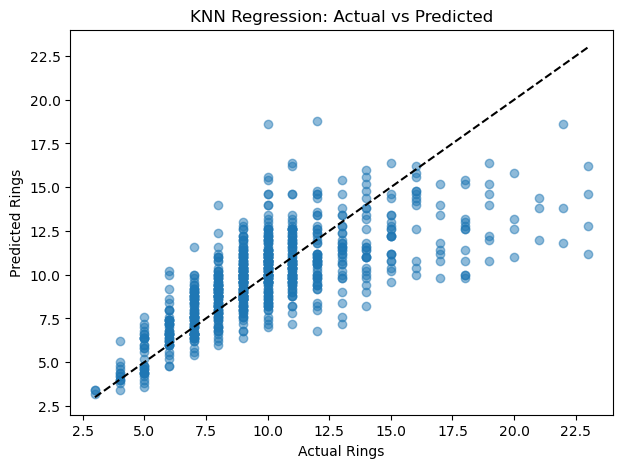

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

abalone_converted = pd.get_dummies(abalone, columns=["Sex"], drop_first=True)
X = abalone_converted.drop("Rings", axis=1)
y = abalone_converted["Rings"]
abalone_converted.head()

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

knn = KNeighborsRegressor(
    n_neighbors = 5,
    weights = "uniform",
    metric = "minkowski",
    p=2
)

knn.fit(X_train_scaled, y_train)
y_train_pred = knn.predict(X_train_scaled)
y_test_pred  = knn.predict(X_test_scaled)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("=== KNN Regression performance (k=5) ===")
print(f"Train RMSE : {train_rmse:.4f}")
print(f"Test  RMSE : {test_rmse:.4f}")

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_test_pred, alpha=0.5)

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--",
    color="black"
)

plt.xlabel("Actual Rings")
plt.ylabel("Predicted Rings")
plt.title("KNN Regression: Actual vs Predicted")
plt.show()